#              Salary Prediction Model

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
dataset = pd.read_csv('Salary_Data.csv')

In [11]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [12]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [13]:
X=dataset[['YearsExperience']] ##independent feature( DataFrame . not array)
y=dataset['Salary'] ##dependent feature

In [14]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42) 

In [15]:
X_t = X_test

In [16]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 


In [17]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()

regressor.fit(X_train,y_train) ## train the model

LinearRegression()

In [18]:
print("The slope or coefficient  is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient  is  [25511.6333602]
Intercept: 71057.33333333333


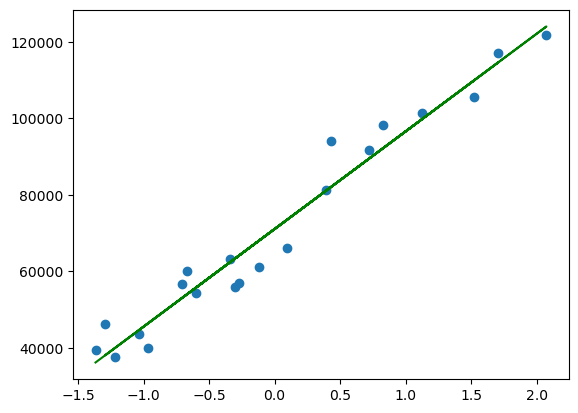

In [36]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'g')

In [20]:
y_pred_test=regressor.predict(X_test)

In [21]:
y_pred_test.ndim

1

In [22]:
y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
12     56957.0
Name: Salary, dtype: float64

In [23]:
pd.DataFrame({'Years_Expercience':X_t['YearsExperience'],'Actual_Salary':y_test,'Predicted_Salary':y_pred_test})

,Years_Expercience,Actual_Salary,Predicted_Salary
27,9.6,112635.0,115573.622884
15,4.9,67938.0,71679.938782
23,8.2,113812.0,102498.908470
17,5.3,83088.0,75415.571471
8,3.2,64445.0,55803.499851
9,3.7,57189.0,60473.040713
28,10.3,122391.0,122110.980090
24,8.7,109431.0,107168.449332
12,4.0,56957.0,63274.765230


In [24]:
myExperience = 2
myExperience_scaled = scaler.transform([[myExperience]])

In [25]:
myExperience_scaled

array([[-1.03720256]])

In [26]:
regressor.predict(myExperience_scaled)

array([44596.60178252])

In [40]:
def Predict_Salary(Experience):
    try:
        if Experience <0.0:
            raise Exception("Sorry, no numbers below zero")
            
        myExperience_scaled = scaler.transform([[Experience]])
        prediction = regressor.predict(myExperience_scaled)[0]
    except Exception as e :
        print(e)
    else:
        print('Your salary will be = {} INR. '.format(int(prediction)))
    return

In [41]:
myExperience = float(input('Enter your experience in years '))

print(Predict_Salary(myExperience))

Enter your experience in years  -1


Sorry, no numbers below zero
None
